In [3]:
import pandas as pd

# Load the data
file_path = 'data.xlsx'  # Update with the correct path
data = pd.read_excel(file_path)

# Convert 'Tanggal' to datetime format
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d-%m-%Y')

# Sort data by date in ascending order
data = data.sort_values('Tanggal')

# Display the first few rows of the dataframe
print(data.head())


        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah
1478 2018-05-11       620        550        660       550
1477 2018-05-14       600        620        650       600
1476 2018-05-15       570        605        610       570
1475 2018-05-16       585        570        585       540
1474 2018-05-17       585        595        600       580


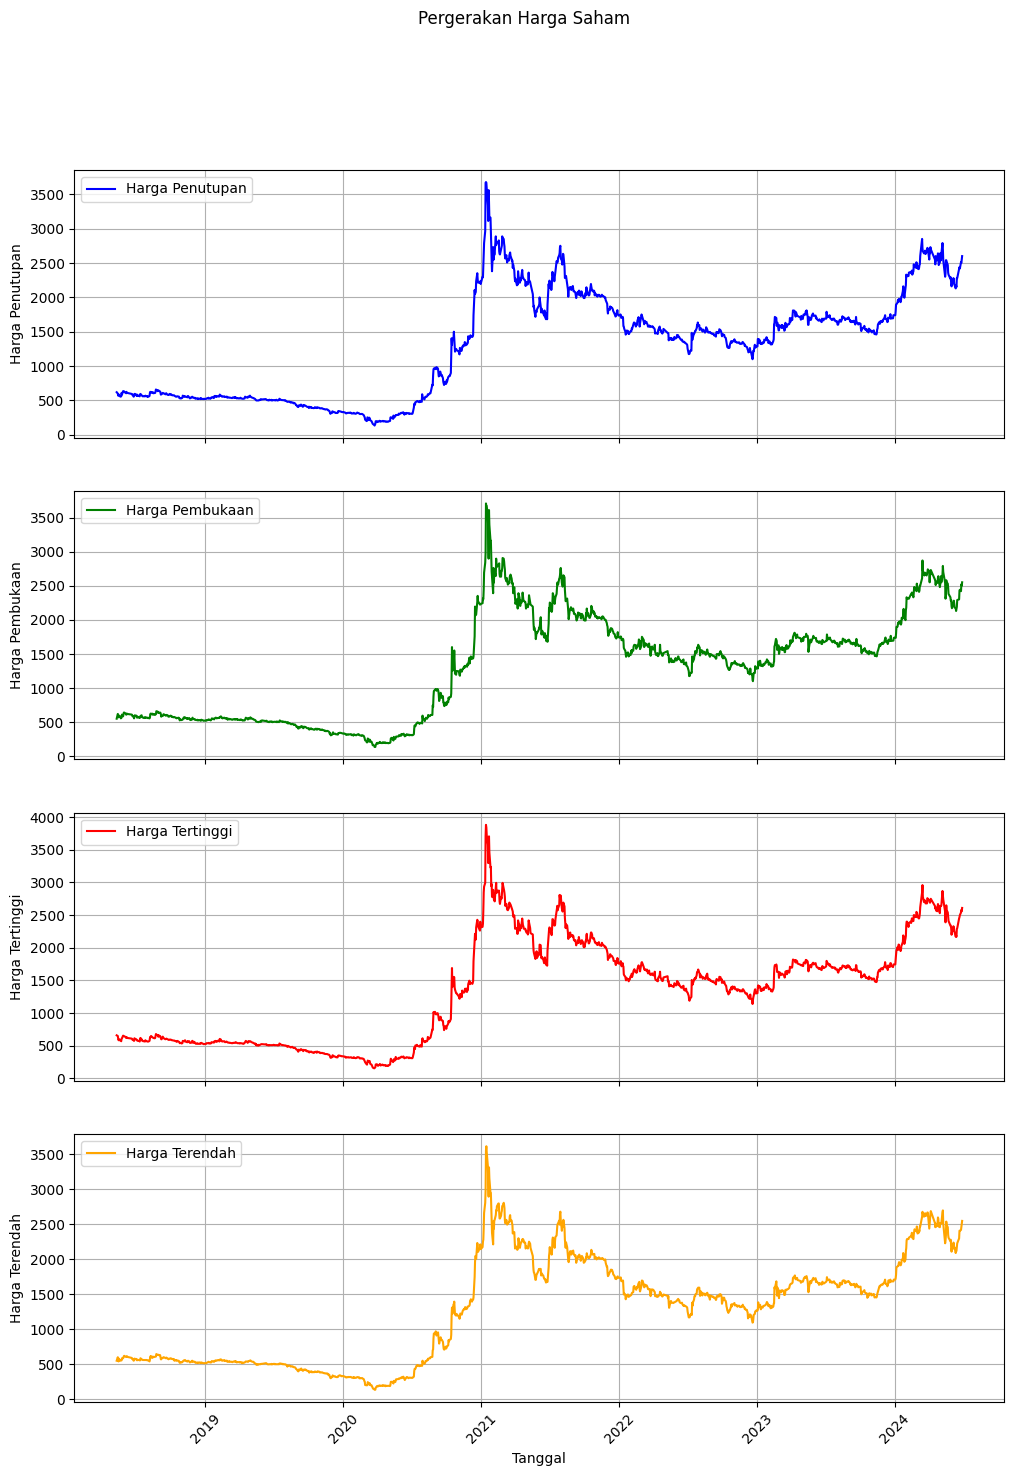

In [7]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# Plot Close Price
axs[0].plot(data['Tanggal'], data['Terakhir'], label='Harga Penutupan', color='b')
axs[0].set_ylabel('Harga Penutupan')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# Plot Open Price
axs[1].plot(data['Tanggal'], data['Pembukaan'], label='Harga Pembukaan', color='g')
axs[1].set_ylabel('Harga Pembukaan')
axs[1].legend(loc='upper left')
axs[1].grid(True)

# Plot High Price
axs[2].plot(data['Tanggal'], data['Tertinggi'], label='Harga Tertinggi', color='r')
axs[2].set_ylabel('Harga Tertinggi')
axs[2].legend(loc='upper left')
axs[2].grid(True)

# Plot Low Price
axs[3].plot(data['Tanggal'], data['Terendah'], label='Harga Terendah', color='orange')
axs[3].set_ylabel('Harga Terendah')
axs[3].set_xlabel('Tanggal')
axs[3].legend(loc='upper left')
axs[3].grid(True)

plt.xticks(rotation=45)
plt.suptitle('Pergerakan Harga Saham')
plt.show()


In [13]:
import plotly.graph_objects as go

# Load the data
file_path = 'data.xlsx'  # Update with the correct path
data = pd.read_excel(file_path)

# Convert 'Tanggal' to datetime format
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d-%m-%Y')

# Sort data by date
data = data.sort_values('Tanggal')

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=data['Tanggal'],
                                     open=data['Pembukaan'],
                                     high=data['Tertinggi'],
                                     low=data['Terendah'],
                                     close=data['Terakhir'])])

# Update layout
fig.update_layout(title='Candlestick Chart Harga Saham',
                  yaxis_title='Harga',
                  xaxis_title='Tanggal',
                  xaxis_rangeslider_visible=True)

# Show the figure
fig.show()


c:\Users\Hizamrul\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to normalize
columns_to_normalize = ['Pembukaan', 'Tertinggi', 'Terendah', 'Terakhir']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Display the normalized data
print(data.head())


        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah
1478 2018-05-11  0.136928   0.115966   0.135498  0.119150
1477 2018-05-14  0.131282   0.135574   0.132815  0.133506
1476 2018-05-15  0.122812   0.131373   0.122082  0.124892
1475 2018-05-16  0.127047   0.121569   0.115374  0.116279
1474 2018-05-17  0.127047   0.128571   0.119399  0.127763


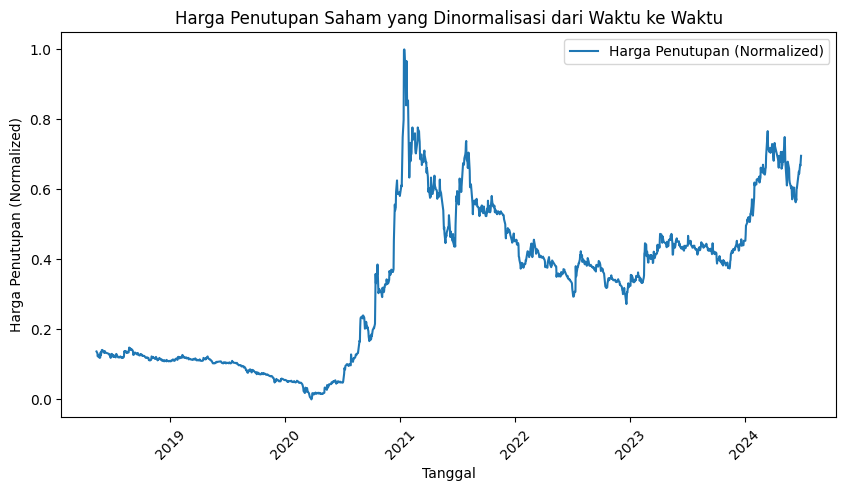

In [15]:
# Plot line chart for normalized 'Terakhir' (closing price)
plt.figure(figsize=(10, 5))
plt.plot(data['Tanggal'], data['Terakhir'], label='Harga Penutupan (Normalized)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Normalized)')
plt.title('Harga Penutupan Saham yang Dinormalisasi dari Waktu ke Waktu')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [17]:
from sklearn.model_selection import train_test_split



# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Define features and target
features = data[columns_to_normalize]
target = data['Terakhir']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Print the number of samples in each set
print(f'Jumlah data training: {X_train.shape[0]}')
print(f'Jumlah data testing: {X_test.shape[0]}')


Jumlah data training: 1183
Jumlah data testing: 296


In [19]:
import numpy as np

# Fungsi untuk menginisialisasi bobot dan bias
def initialize_weights(input_dim, hidden_units, output_dim):
    np.random.seed(42)  # Untuk hasil yang dapat direproduksi

    # Bobot dan bias untuk gerbang forget
    Wf = np.random.randn(hidden_units, hidden_units + input_dim) * 0.01
    bf = np.zeros((hidden_units, 1))

    # Bobot dan bias untuk gerbang input
    Wi = np.random.randn(hidden_units, hidden_units + input_dim) * 0.01
    bi = np.zeros((hidden_units, 1))

    # Bobot dan bias untuk gerbang output
    Wo = np.random.randn(hidden_units, hidden_units + input_dim) * 0.01
    bo = np.zeros((hidden_units, 1))

    # Bobot dan bias untuk pembaruan status sel
    Wc = np.random.randn(hidden_units, hidden_units + input_dim) * 0.01
    bc = np.zeros((hidden_units, 1))

    # Bobot dan bias untuk output layer
    Wy = np.random.randn(output_dim, hidden_units) * 0.01
    by = np.zeros((output_dim, 1))

    return Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by

# Memanggil fungsi untuk menginisialisasi bobot dan bias
Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by = initialize_weights(input_dim, hidden_units, output_dim)

# Menampilkan beberapa parameter yang diinisialisasi
print("Inisialisasi bobot dan bias selesai:")
print(f"Wf shape: {Wf.shape}")
print(f"bf shape: {bf.shape}")
print(f"Wi shape: {Wi.shape}")
print(f"bi shape: {bi.shape}")
print(f"Wo shape: {Wo.shape}")
print(f"bo shape: {bo.shape}")
print(f"Wc shape: {Wc.shape}")
print(f"bc shape: {bc.shape}")
print(f"Wy shape: {Wy.shape}")
print(f"by shape: {by.shape}")


Inisialisasi bobot dan bias selesai:
Wf shape: (50, 54)
bf shape: (50, 1)
Wi shape: (50, 54)
bi shape: (50, 1)
Wo shape: (50, 54)
bo shape: (50, 1)
Wc shape: (50, 54)
bc shape: (50, 1)
Wy shape: (1, 50)
by shape: (1, 1)


In [21]:
# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fungsi aktivasi tanh
def tanh(x):
    return np.tanh(x)


In [22]:
# Fungsi untuk forward pass dalam sel LSTM
def lstm_forward(X, h_prev, C_prev, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by):
    # Menggabungkan input dan hidden state sebelumnya
    concat = np.concatenate((h_prev, X), axis=0)

    # Menghitung gerbang forget
    ft = sigmoid(np.dot(Wf, concat) + bf)
    
    # Menghitung gerbang input
    it = sigmoid(np.dot(Wi, concat) + bi)
    
    # Menghitung kandidat status sel baru
    C_tilde = tanh(np.dot(Wc, concat) + bc)
    
    # Menghitung status sel baru
    C = ft * C_prev + it * C_tilde
    
    # Menghitung gerbang output
    ot = sigmoid(np.dot(Wo, concat) + bo)
    
    # Menghitung hidden state baru
    h = ot * tanh(C)

    # Menghitung output
    y = np.dot(Wy, h) + by
    
    return h, C, y

# Inisialisasi hidden state dan cell state dengan nol
h_prev = np.zeros((hidden_units, 1))
C_prev = np.zeros((hidden_units, 1))

# Contoh input (batch pertama dari data training)
X_example = X_train.iloc[0].values.reshape(-1, 1)

# Lakukan forward pass
h, C, y = lstm_forward(X_example, h_prev, C_prev, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by)

print("Forward pass selesai:")
print(f"h (hidden state): {h}")
print(f"C (cell state): {C}")
print(f"y (output): {y}")


Forward pass selesai:
h (hidden state): [[-7.20736471e-04]
 [-6.15821165e-04]
 [ 4.31409494e-04]
 [ 3.02662810e-04]
 [ 8.59575054e-04]
 [-7.27172924e-05]
 [-5.43125974e-04]
 [-6.14950177e-04]
 [-1.44571787e-04]
 [-7.45045371e-05]
 [ 3.33542817e-04]
 [ 2.37370113e-04]
 [ 1.28697713e-04]
 [-1.43107522e-03]
 [ 9.44336997e-05]
 [ 8.45416921e-05]
 [-1.15364477e-03]
 [ 7.74937153e-04]
 [ 4.04299293e-04]
 [-2.77860318e-04]
 [ 1.81488152e-04]
 [-5.35449264e-04]
 [-2.35297703e-04]
 [ 2.16631415e-04]
 [-2.80065782e-04]
 [ 7.18333480e-05]
 [ 3.68778252e-04]
 [ 1.11551481e-05]
 [ 2.37050384e-04]
 [-3.18758682e-04]
 [-1.53524313e-03]
 [-1.27696080e-03]
 [ 1.88906966e-04]
 [ 5.96880458e-06]
 [-1.26792827e-03]
 [-7.23259461e-05]
 [ 8.14204344e-04]
 [-9.18424057e-04]
 [ 5.67685027e-04]
 [-3.10584289e-05]
 [-3.94305592e-05]
 [-1.73427482e-04]
 [ 7.01539746e-04]
 [-7.60995961e-04]
 [-1.36468786e-04]
 [-2.70845959e-04]
 [-9.33819177e-04]
 [ 3.27198469e-04]
 [ 1.02518316e-04]
 [-2.84329637e-04]]
C (cell s

In [24]:
# Fungsi untuk menghitung loss (Mean Squared Error)
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Fungsi untuk forward pass dalam sel LSTM
def lstm_forward(X, h_prev, C_prev, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by):
    concat = np.concatenate((h_prev, X), axis=0)

    ft = sigmoid(np.dot(Wf, concat) + bf)
    it = sigmoid(np.dot(Wi, concat) + bi)
    C_tilde = tanh(np.dot(Wc, concat) + bc)
    C = ft * C_prev + it * C_tilde
    ot = sigmoid(np.dot(Wo, concat) + bo)
    h = ot * tanh(C)

    y = np.dot(Wy, h) + by
    return h, C, y, ft, it, C_tilde, ot

# Fungsi untuk menghitung gradien dengan BPTT
def lstm_backward(X, y_true, h, C, ft, it, C_tilde, ot, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by, h_prev, C_prev, learning_rate=0.001):
    # Forward pass untuk mendapatkan prediksi
    h, C, y_pred, ft, it, C_tilde, ot = lstm_forward(X, h_prev, C_prev, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by)
    
    # Menghitung loss
    loss = compute_loss(y_true, y_pred)
    
    # Gradien untuk output layer
    dy = y_pred - y_true
    dWy = np.dot(dy, h.T)
    dby = np.sum(dy, axis=1, keepdims=True)
    
    # Gradien untuk hidden state
    dh = np.dot(Wy.T, dy)
    do = dh * tanh(C)
    dot = do * ot * (1 - ot)
    
    # Gradien untuk cell state
    dC = dh * ot * (1 - tanh(C)**2)
    dC += dC
    
    dCtilde = dC * it
    dCtilde = dCtilde * (1 - C_tilde**2)
    
    # Gradien untuk input gate
    di = dC * C_tilde
    dit = di * it * (1 - it)
    
    # Gradien untuk forget gate
    df = dC * C_prev
    dft = df * ft * (1 - ft)
    
    # Gradien untuk bobot dan bias
    concat = np.concatenate((h_prev, X), axis=0)
    dWf = np.dot(dft, concat.T)
    dbf = np.sum(dft, axis=1, keepdims=True)
    dWi = np.dot(dit, concat.T)
    dbi = np.sum(dit, axis=1, keepdims=True)
    dWo = np.dot(dot, concat.T)
    dbo = np.sum(dot, axis=1, keepdims=True)
    dWc = np.dot(dCtilde, concat.T)
    dbc = np.sum(dCtilde, axis=1, keepdims=True)
    
    # Update bobot dan bias dengan SGD
    Wf -= learning_rate * dWf
    bf -= learning_rate * dbf
    Wi -= learning_rate * dWi
    bi -= learning_rate * dbi
    Wo -= learning_rate * dWo
    bo -= learning_rate * dbo
    Wc -= learning_rate * dWc
    bc -= learning_rate * dbc
    Wy -= learning_rate * dWy
    by -= learning_rate * dby
    
    return loss, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by

# Inisialisasi hidden state dan cell state dengan nol
h_prev = np.zeros((hidden_units, 1))
C_prev = np.zeros((hidden_units, 1))

# Contoh input dan output
X_example = X_train.iloc[0].values.reshape(-1, 1)
y_true_example = np.array([y_train.iloc[0]]).reshape(-1, 1)

# Forward pass untuk mendapatkan nilai intermediate
h, C, y_pred, ft, it, C_tilde, ot = lstm_forward(X_example, h_prev, C_prev, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by)

# Melakukan backward pass
loss, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by = lstm_backward(X_example, y_true_example, h, C, ft, it, C_tilde, ot, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by, h_prev, C_prev)

print("Backward pass selesai:")
print(f"Loss: {loss}")


Backward pass selesai:
Loss: 0.018763845337705694


In [25]:
# Parameter pelatihan
epochs = 100
learning_rate = 0.001
batch_size = 32

# Inisialisasi bobot dan bias
Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by = initialize_weights(input_dim, hidden_units, output_dim)

# Inisialisasi hidden state dan cell state dengan nol
h_prev = np.zeros((hidden_units, 1))
C_prev = np.zeros((hidden_units, 1))

# Melakukan pelatihan
for epoch in range(epochs):
    total_loss = 0
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train.iloc[i:i+batch_size].values.T
        y_batch = y_train.iloc[i:i+batch_size].values.reshape(-1, 1).T
        
        for t in range(X_batch.shape[1]):
            X_t = X_batch[:, t].reshape(-1, 1)
            y_t = y_batch[:, t].reshape(-1, 1)
            
            # Forward pass
            h, C, y_pred, ft, it, C_tilde, ot = lstm_forward(X_t, h_prev, C_prev, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by)
            
            # Backward pass
            loss, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by = lstm_backward(X_t, y_t, h, C, ft, it, C_tilde, ot, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by, h_prev, C_prev, learning_rate)
            
            total_loss += loss
            
            # Update hidden state dan cell state
            h_prev = h
            C_prev = C
    
    # Rata-rata loss per epoch
    avg_loss = total_loss / len(X_train)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss}")

print("Proses pelatihan selesai.")


Epoch 1/100, Loss: 0.06713359321499988
Epoch 2/100, Loss: 0.04195017795120373
Epoch 3/100, Loss: 0.04207337219064624
Epoch 4/100, Loss: 0.04282225606875622
Epoch 5/100, Loss: 0.04309725874423846
Epoch 6/100, Loss: 0.04316443633757618
Epoch 7/100, Loss: 0.043161172892607375
Epoch 8/100, Loss: 0.04313447346769266
Epoch 9/100, Loss: 0.04309893696082608
Epoch 10/100, Loss: 0.04305879717850808
Epoch 11/100, Loss: 0.043015060928228724
Epoch 12/100, Loss: 0.04296772470835384
Epoch 13/100, Loss: 0.04291645293005161
Epoch 14/100, Loss: 0.04286078263670039
Epoch 15/100, Loss: 0.04280018308861525
Epoch 16/100, Loss: 0.042734070829900675
Epoch 17/100, Loss: 0.042661811008879
Epoch 18/100, Loss: 0.042582714361370316
Epoch 19/100, Loss: 0.04249603274262271
Epoch 20/100, Loss: 0.04240095410802649
Epoch 21/100, Loss: 0.042296597245499064
Epoch 22/100, Loss: 0.04218200639139848
Epoch 23/100, Loss: 0.04205614582328568
Epoch 24/100, Loss: 0.04191789452743446
Epoch 25/100, Loss: 0.041766041059660204
Epoch

In [26]:
import pickle

# Fungsi untuk menyimpan model
def save_model(filepath, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by):
    model = {
        'Wf': Wf, 'bf': bf,
        'Wi': Wi, 'bi': bi,
        'Wo': Wo, 'bo': bo,
        'Wc': Wc, 'bc': bc,
        'Wy': Wy, 'by': by
    }
    with open(filepath, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filepath}")

# Menyimpan model setelah pelatihan
save_model('lstm_model.pkl', Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by)


Model saved to lstm_model.pkl


In [27]:
# Fungsi untuk memuat model
def load_model(filepath):
    with open(filepath, 'rb') as file:
        model = pickle.load(file)
    print(f"Model loaded from {filepath}")
    return model['Wf'], model['bf'], model['Wi'], model['bi'], model['Wo'], model['bo'], model['Wc'], model['bc'], model['Wy'], model['by']

# Memuat model
Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by = load_model('lstm_model.pkl')


Model loaded from lstm_model.pkl


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fungsi untuk membuat prediksi dengan model LSTM
def predict(X, h_prev, C_prev, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by):
    y_pred = []
    for t in range(X.shape[1]):
        X_t = X[:, t].reshape(-1, 1)
        h, C, y, _, _, _, _ = lstm_forward(X_t, h_prev, C_prev, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by)
        y_pred.append(y.item())
        h_prev = h
        C_prev = C
    return np.array(y_pred)

# Menginisialisasi hidden state dan cell state untuk data pengujian
h_prev_test = np.zeros((hidden_units, 1))
C_prev_test = np.zeros((hidden_units, 1))

# Membuat prediksi untuk data pengujian
X_test_np = X_test.values.T
y_test_np = y_test.values.reshape(-1, 1).T

y_pred_test = predict(X_test_np, h_prev_test, C_prev_test, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by)

# Mengembalikan bentuk asli data target dan prediksi
y_test_original = y_test_np.flatten()
y_pred_test_original = y_pred_test.flatten()


In [29]:
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, y_pred_test_original)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_test_original))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.011894976857755663
Root Mean Squared Error (RMSE): 0.020806716173926435


Prediksi harga saham untuk 10 hari ke depan:
[0.33462536 0.44927668 0.52526348 0.5753339  0.60831837 0.63005061
 0.64437273 0.65381358 0.66003794 0.66414223]


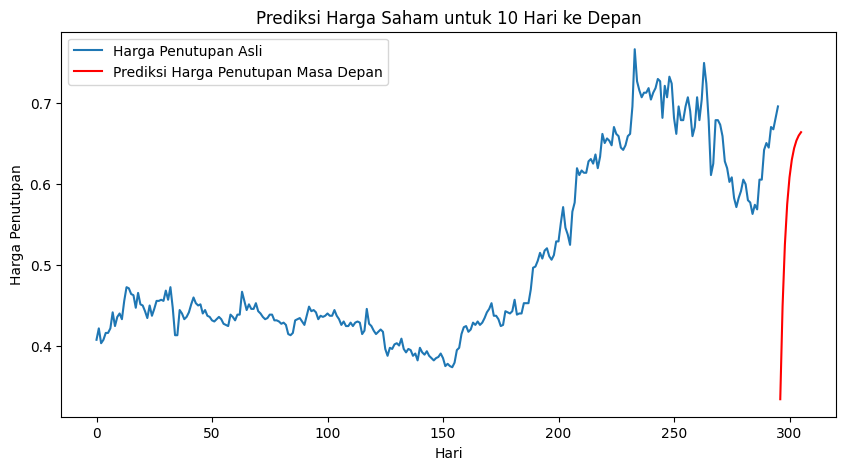

In [37]:
import matplotlib.pyplot as plt

# Fungsi untuk membuat prediksi masa depan dengan model LSTM
def predict_future(X, h_prev, C_prev, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by, n_steps):
    predictions = []
    for _ in range(n_steps):
        h, C, y, _, _, _, _ = lstm_forward(X, h_prev, C_prev, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by)
        predictions.append(y.item())
        
        # Update X untuk langkah prediksi berikutnya
        X = np.roll(X, -1, axis=1)
        X[0, -1] = y.item()
        
        # Update hidden state dan cell state
        h_prev = h
        C_prev = C
        
    return np.array(predictions)

# Inisialisasi hidden state dan cell state untuk prediksi masa depan
h_prev_future = np.zeros((hidden_units, 1))
C_prev_future = np.zeros((hidden_units, 1))

# Data input terbaru untuk prediksi masa depan (menggunakan data pengujian terakhir)
X_latest = X_test_np[:, -1].reshape(-1, 1)

# Membuat prediksi untuk 10 langkah ke depan
n_steps = 10
future_predictions = predict_future(X_latest, h_prev_future, C_prev_future, Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by, n_steps)

# Menampilkan hasil prediksi
print("Prediksi harga saham untuk 10 hari ke depan:")
print(future_predictions)

# Visualisasi prediksi masa depan
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test_original)), y_test_original, label='Harga Penutupan Asli')
plt.plot(range(len(y_test_original), len(y_test_original) + n_steps), future_predictions, label='Prediksi Harga Penutupan Masa Depan', color='red')
plt.xlabel('Hari')
plt.ylabel('Harga Penutupan')
plt.title('Prediksi Harga Saham untuk 10 Hari ke Depan')
plt.legend()
plt.show()
